<a href="https://colab.research.google.com/github/swarnava-bag/masters_thesis/blob/main/Scalar_GD_RLS_GRLS_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:

beta=0.3
gamma=0.2
h=0.5
x_0=0.05
num_iter=200


In [ ]:
#Data Generation
x=[]
x.append(x_0)
for i in range (1,num_iter):
  #print(x)
  v=beta*(1-x[i-1])
  v1=(v-gamma)*h
  k=x[i-1]+x[i-1]*v1+1e-5*np.random.rand()
  x.append(k)

In [ ]:
x=np.array(x)
x=x.reshape(num_iter,1)
x_transpose= x.reshape(1,num_iter)
x_transpose.shape


(1, 200)

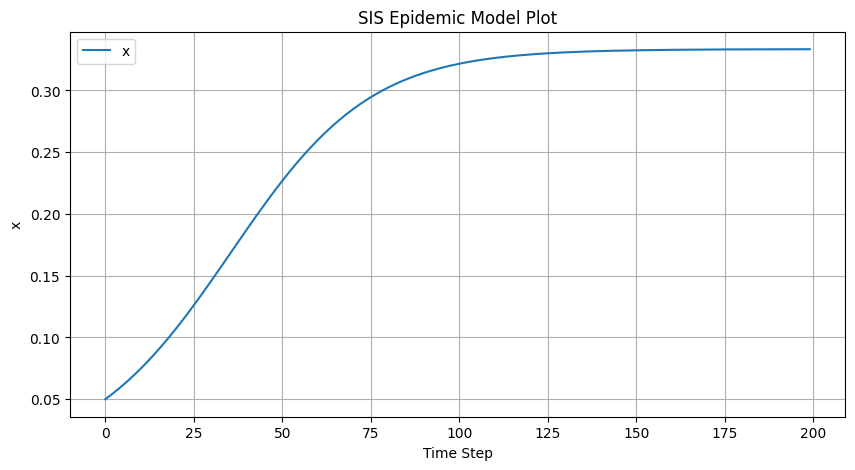

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(0, num_iter), x, label='x')
plt.xlabel('Time Step')
plt.ylabel('x')
plt.legend()
plt.title('SIS Epidemic Model Plot')
plt.grid(True)
plt.show()

In [ ]:
A=np.dot(x,x_transpose)
A.shape

(200, 200)

In [ ]:
#kappa=np.linalg.cond(A)
#kappa
# Very High Condition no., almost tending towards infinity. Hence Ill-Conditioned Matrix

In [ ]:
cols=2
rows=num_iter
size = rows*cols
phi = np.array([0.00]*size).reshape(rows,cols)
y=np.array([0.00]*num_iter)
for i in range(num_iter-1):
  phi[i][0] = (1-x[i])*x[i]
  phi[i][1] = -x[i]
  y[i]= (x[i+1]-x[i])/h

print(y.shape)

(200,)


# **Gradient Descent Estimate**

In [ ]:
#Initialize GD Parameters
theta_GD = np.full((2, 1), 0.6)
estimated_GD_beta_values = []
estimated_GD_gamma_values = []

In [ ]:
for i in range(num_iter-1):
  phi_i = phi[i].reshape(1,2)
  y_i = y[i]
  theta_GD=theta_GD+phi_i.T.dot(y_i-phi_i.dot(theta_GD))
  estimated_GD_beta_values.append(theta_GD[0])
  estimated_GD_gamma_values.append(theta_GD[1])

## **RLS Estimation**

In [ ]:
# Initialize RLS parameters
P = 1e3*np.identity(2)
theta = np.full((2, 1), 0.6)
lambda_ = 0.94

estimated_beta_values = []
estimated_gamma_values = []

In [ ]:
for i in range(num_iter-1):
    phi_i = phi[i].reshape(1,2)
    y_i = y[i]

    # RLS update
    K = P.dot(phi_i.T) / (lambda_ + phi_i.dot(P).dot(phi_i.T))
    P = (P - K.dot(phi_i).dot(P))*(1 / lambda_)
    theta = theta + P.dot((phi_i.T*y_i - phi_i.T @ phi_i.dot(theta)))


    estimated_beta_values.append(theta[0])
    estimated_gamma_values.append(theta[1])

In [ ]:
K.shape

(2, 1)

In [ ]:
#print(phi_i.dot(P).dot(phi_i.T).shape)
print(phi_i.shape)

(1, 2)


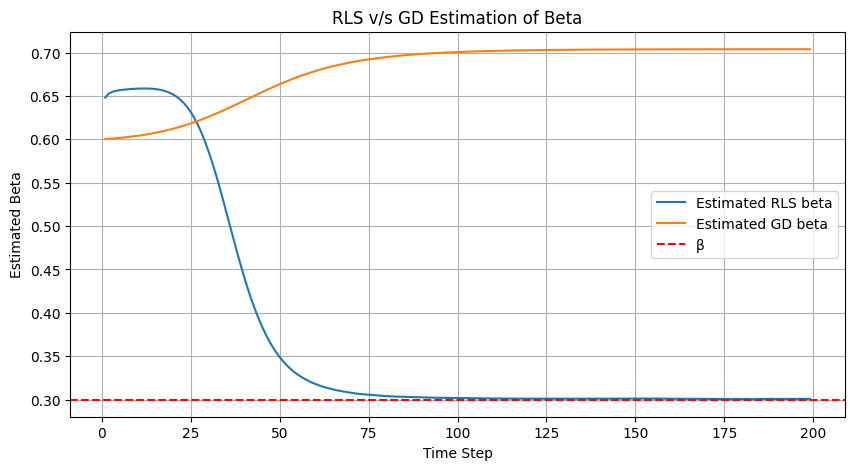

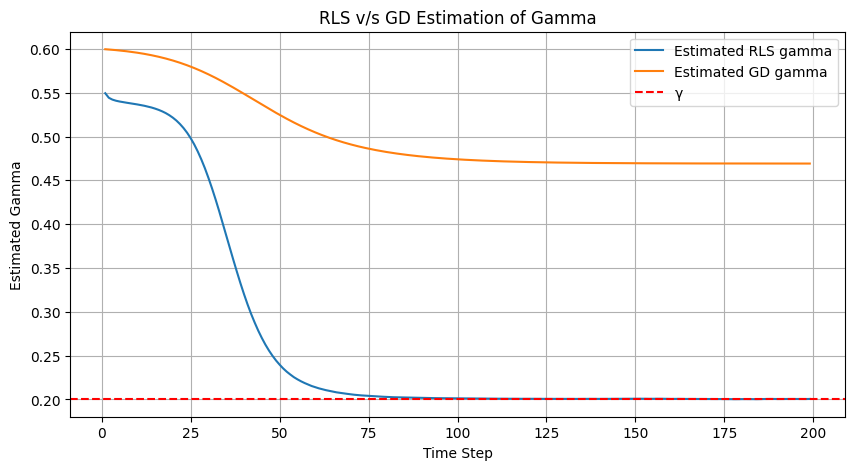

In [ ]:
# Plotting the estimated values using RLS Estimation
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_iter), estimated_beta_values, label='Estimated RLS beta')
plt.plot(range(1, num_iter), estimated_GD_beta_values, label='Estimated GD beta')
plt.axhline(y=beta, color='red', linestyle='--', label='β')
plt.xlabel('Time Step')
plt.ylabel('Estimated Beta')
plt.legend()
plt.title('RLS v/s GD Estimation of Beta')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_iter), estimated_gamma_values, label='Estimated RLS gamma')
plt.plot(range(1, num_iter), estimated_GD_gamma_values, label='Estimated GD gamma')
plt.axhline(gamma, color='red', linestyle='--', label='γ')
plt.xlabel('Time Step')
plt.ylabel('Estimated Gamma')
plt.legend()
plt.title('RLS v/s GD Estimation of Gamma')
plt.grid(True)
plt.show()

In [ ]:
final_estimated_beta = estimated_beta_values[-1]
final_estimated_gamma = estimated_gamma_values[-1]
R0_RLS=final_estimated_beta/final_estimated_gamma
final_estimated_GD_beta = estimated_GD_beta_values[-1]
final_estimated_GD_gamma = estimated_GD_gamma_values[-1]
R0_GD = final_estimated_GD_beta/final_estimated_GD_gamma
Actual_R0=beta/gamma

print(f"Final GD Estimated beta: {final_estimated_GD_beta}")
print(f"Final GD Estimated gamma: {final_estimated_GD_gamma}")

print(f"Final RLS Estimated beta: {final_estimated_beta}")
print(f"Final RLS Estimated gamma: {final_estimated_gamma}")

print(f"Actual Beta: {beta}")
print(f"Acutal Gamma: {gamma}")

print(f"R0 value from GD: {R0_GD[0]}")
print(f"R0 value from RLS: {R0_RLS[0]}")
print(f"Acutal Actual R0: {Actual_R0}")

Final GD Estimated beta: [0.70385467]
Final GD Estimated gamma: [0.46921266]
Final RLS Estimated beta: [0.30084647]
Final RLS Estimated gamma: [0.20053511]
Actual Beta: 0.3
Acutal Gamma: 0.2
R0 value from GD: 1.5000760300811937
R0 value from RLS: 1.5002184604025404
Acutal Actual R0: 1.4999999999999998


# **R0 Visualization**

In [ ]:
#RLS
estimated_beta_values_array=np.array(estimated_beta_values)
estimated_gamma_values_array=np.array(estimated_gamma_values)
estimated_R0_RLS=estimated_beta_values_array/estimated_gamma_values_array
#GD
estimated_GD_beta_values_array=np.array(estimated_GD_beta_values)
estimated_GD_gamma_values_array=np.array(estimated_GD_gamma_values)
estimated_R0_GD=estimated_GD_beta_values_array/estimated_GD_gamma_values_array

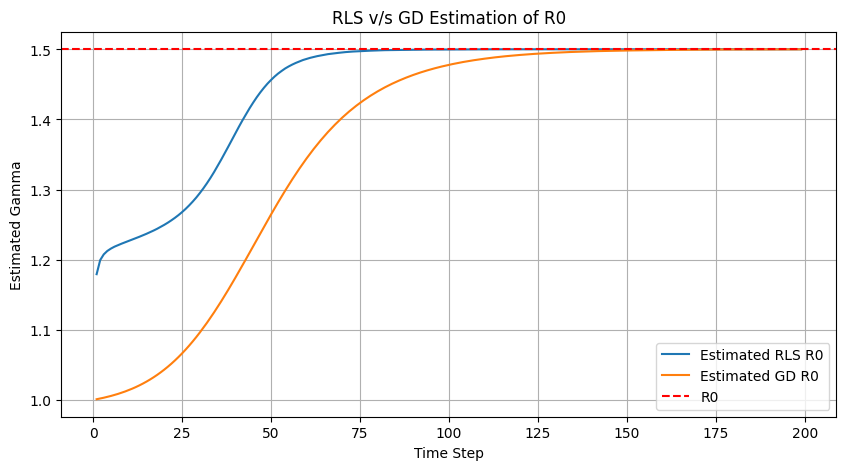

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_iter), estimated_R0_RLS, label='Estimated RLS R0')
plt.plot(range(1, num_iter), estimated_R0_GD, label='Estimated GD R0')
plt.axhline(Actual_R0, color='red', linestyle='--', label='R0')
plt.xlabel('Time Step')
plt.ylabel('Estimated Gamma')
plt.legend()
plt.title('RLS v/s GD Estimation of R0')
plt.grid(True)
plt.show()

## **GRLS Estimation**

In [ ]:
from scipy.linalg import eigvals

In [ ]:
#Function Definitions

def phi_tr_phi(x):
    phi_var=np.zeros((1,2))
    phi_var[0][0]= (1-x)*x
    phi_var[0][1]= -x
    phi_T_phi=(phi_var.T).dot(phi_var)
    #print(phi.T_phi.shape)
    return phi_T_phi

def phi_G(x):
    phi_var=np.zeros((1,2))
    phi_var[0][0]= (1-x)*x
    phi_var[0][1]= -x
    phi
    return phi_var

def condition_no (Z):
  Eigs = np.sort(np.linalg.eigvals(Z.T@Z))
  return np.infty if Eigs[0] == 0 else np.sqrt(Eigs[-1])/np.sqrt(Eigs[0])

In [ ]:
alpha=0.94
mu=1e3
# Initialize GRLS parameters
H_curr=np.zeros((2,2))
Pk = np.eye(2)*mu
alt=math.sqrt(1-alpha)
#print(alt)
theta_2 = np.full((2, 1), 0.6)
#lambda_ = 0.9
#H_new= phi_tr_phi(x[0])

PH =phi[0].reshape(1,2)
ve=np.zeros((2,1))


theta_list=[]


In [ ]:
#Temporary Space
#mu.shape
PH.shape

#print(alt)

(1, 2)

In [ ]:
estimated_grls_beta_values = []
estimated_grls_gamma_values = []
for i in range(num_iter-1):
    #phi_T_phi_i=phi_tr_phi(x[i])
    phi_i=phi[i].reshape(1,2)
    H_new = H_curr + phi_i.T @ (phi_i)
    Kappa_new=condition_no(H_new)
    Kappa=condition_no(H_curr)
    if (Kappa_new < Kappa):
      H_curr=H_new
      #print("1")
      PH=np.vstack([PH,phi_i])
      ve=ve+phi_i.T*((x[i+1]-x[i])/h)
      Phi=alt*PH
      H=(1-alpha)*H_curr
      v=(1-alpha)*ve
    else:
      #print("2")
      #H_new=H_curr
      Phi=np.vstack([alt*PH,phi_i])
      H=(1-alpha)*H_curr+phi_i.T.dot(phi_i)
      v=(1-alpha)*ve+phi_i.T*((x[i+1]-x[i])/h)
    # Update
    inner=Phi.dot(Pk).dot(Phi.T)
    N=np.linalg.inv(alpha*(np.eye(inner.shape[0]))+inner)
    #print(N)
    Pk = (Pk - Pk @ (Phi.T) @ (N) @ (Phi) @ (Pk))*(1/alpha)
    #print(Pk)
    theta_2 = theta_2 + Pk@(v - H.dot(theta_2))
    #print(theta_2)


    estimated_grls_beta_values.append(theta_2[0])
    estimated_grls_gamma_values.append(theta_2[1])

<ipython-input-132-1a40d46dae21>:20: RuntimeWarning: invalid value encountered in sqrt
  return np.infty if Eigs[0] == 0 else np.sqrt(Eigs[-1])/np.sqrt(Eigs[0])


In [ ]:
print(v.shape)
print(estimated_grls_gamma_values)

(2, 1)
[array([0.55188263]), array([0.54583427]), array([0.54330113]), array([0.54176574]), array([0.54068212]), array([0.53978709]), array([0.53902727]), array([0.53830038]), array([0.53756171]), array([0.5367946]), array([0.53596938]), array([0.53508973]), array([0.53406505]), array([0.53292899]), array([0.5328347]), array([0.53260102]), array([0.53217401]), array([0.53149744]), array([0.53051316]), array([0.52917394]), array([0.52744022]), array([0.52527293]), array([0.52264444]), array([0.51951815]), array([0.51584191]), array([0.51155302]), array([0.50656259]), array([0.50077766]), array([0.49409168]), array([0.48637121]), array([0.47751498]), array([0.46742761]), array([0.4560476]), array([0.44336446]), array([0.42942926]), array([0.4144146]), array([0.39855305]), array([0.38213776]), array([0.36550433]), array([0.34901393]), array([0.33300316]), array([0.317776]), array([0.3035709]), array([0.29051715]), array([0.27870578]), array([0.26814464]), array([0.2588086]), array([0.2506

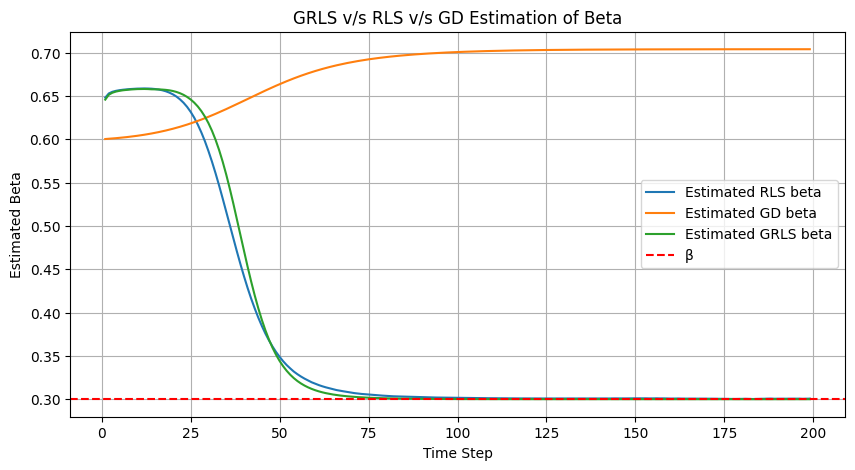

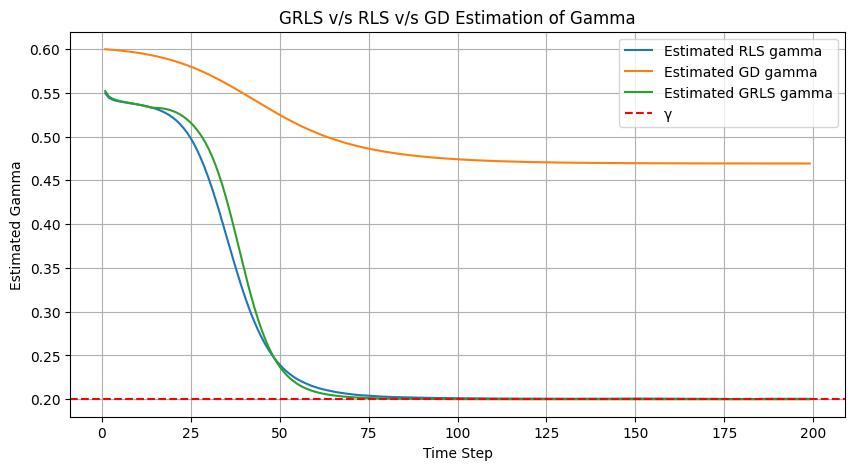

In [ ]:
# Plotting the estimated values using RLS Estimation
plt.figure(figsize=(10, 5))
#plt.ylim(0,0.3)
plt.plot(range(1, num_iter), estimated_beta_values, label='Estimated RLS beta')
plt.plot(range(1, num_iter), estimated_GD_beta_values, label='Estimated GD beta')
plt.plot(range(1,num_iter), estimated_grls_beta_values, label='Estimated GRLS beta')
plt.axhline(y=beta, color='red', linestyle='--', label='β')
plt.xlabel('Time Step')
plt.ylabel('Estimated Beta')
plt.legend()
plt.title('GRLS v/s RLS v/s GD Estimation of Beta')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 5))
#plt.ylim(0.1,0.2)
plt.plot(range(1, num_iter), estimated_gamma_values, label='Estimated RLS gamma')
plt.plot(range(1, num_iter), estimated_GD_gamma_values, label='Estimated GD gamma')
plt.plot(range(1, num_iter), estimated_grls_gamma_values, label='Estimated GRLS gamma')
plt.axhline(gamma, color='red', linestyle='--', label='γ')
plt.xlabel('Time Step')
plt.ylabel('Estimated Gamma')
plt.legend()
plt.title('GRLS v/s RLS v/s GD Estimation of Gamma')
plt.grid(True)
plt.show()


In [ ]:
final_grls_estimated_beta = estimated_grls_beta_values[-1]
final_grls_estimated_gamma = estimated_grls_gamma_values[-1]

print(f"Final Estimated beta: {final_grls_estimated_beta}")
print(f"Final Estimated gamma: {final_grls_estimated_gamma}")

Final Estimated beta: [0.30016167]
Final Estimated gamma: [0.20007661]


In [ ]:
#GRLS
estimated_grls_beta_values_array=np.array(estimated_grls_beta_values)
estimated_grls_gamma_values_array=np.array(estimated_grls_gamma_values)
estimated_R0_grls=estimated_grls_beta_values_array/estimated_grls_gamma_values_array

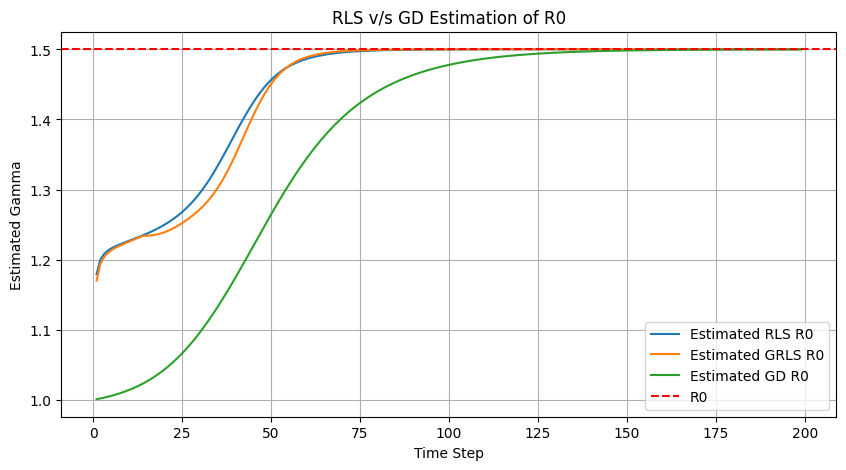

In [ ]:
plt.figure(figsize=(10, 5))
#plt.ylim(-2,3)
plt.plot(range(1, num_iter), estimated_R0_RLS, label='Estimated RLS R0')
plt.plot(range(1, num_iter), estimated_R0_grls, label='Estimated GRLS R0')
plt.plot(range(1, num_iter), estimated_R0_GD, label='Estimated GD R0')

plt.axhline(Actual_R0, color='red', linestyle='--', label='R0')
plt.xlabel('Time Step')
plt.ylabel('Estimated Gamma')
plt.legend()
plt.title('RLS v/s GD Estimation of R0')
plt.grid(True)
plt.show()